# Vpogled v nepremičnine: Analiza slovenskega nepremičninskega trga

Ta projekt si prizadeva zagotoviti poglobljeno analizo slovenskega nepremičninskega trga, s poudarkom na prodaji in dolgoročnem najemu. Podatki za to analizo so bili pridobljeni s spletnega mesta https://www.nepremicnine.net/, ki zajema širok spekter nepremičninskih oglasov.

Z uporabo knjižnice Pandas v programskem jeziku Python znotraj okolja Jupyter Notebook bo projekt raziskal ključne tržne trende, cenovne vzorce in geografsko razporeditev nepremičnin. S pomočjo vizualizacije teh podatkov in izvedbe statističnih analiz bo projekt poskušal ponuditi dragocene vpoglede v dinamiko slovenskega nepremičninskega trga, kar bi lahko pomagalo kupcem, najemnikom in vlagateljem pri sprejemanju premišljenih odločitev.

# Vsebina
1. [Pregled trga](#Poglavje-1)
   - [Razporeditev oglasov po tipih (prodaja/oddaja)](#Razdelek-1.1)
   - [Razporeditev oglasov po tipu nepremičnine (hiša/stanovanje)](#Razdelek-1.2)
   - [Geografska razporeditev](#Razdelek-1.3)
2. [Analiza cen](#Poglavje-2)
   - [Razporeditev cen](#Razdelek-2.1)
     - [Razporeditev cen (prodaja)](#Podrazdelek-2.1.1)
     - [Razporeditev cen (oddaja)](#Podrazdelek-2.1.2)
   - [Povprečne in mediane cene](#Razdelek-2.2)
     - [Povprečne in mediane cene (prodaja)](#Podrazdelek-2.2.1)
     - [Povprečne in mediane cene (oddaja)](#Podrazdelek-2.2.2)
   - [Regionalne razlike v cenah](#Razdelek-2.3)
     - [Regionalne razlike v cenah (prodaja)](#Podrazdelek-2.3.1)
     - [Regionalne razlike v cenah (oddaja)](#Podrazdelek-2.3.2)
3. [Analiza značilnosti nepremičnin](#Poglavje-3)
   - [Leto gradnje](#Razdelek-3.1)
   - [Bivalni prostor](#Razdelek-3.2)
4. [Primerjalna analiza najema in prodaje](#Poglavje-4)
   - [Razmerje cen](#Razdelek-4.1)
   - [Donosnost najema](#Razdelek-4.2)
5. [Rezultati](#Poglavje-5)
     

### Uvoz podatkov in prilagoditev

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

df = pd.read_csv('data/ads.csv', index_col='ad_id')
sell_df = df[df['ad_type'] == 'prodaja']
rent_df = df[df['ad_type'] == 'oddaja']
pd.options.display.max_rows = 20
pd.options.mode.chained_assignment = None

In [2]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7582 entries, 6599717 to 6828386
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ad_type           7582 non-null   object 
 1   real_estate_type  7582 non-null   object 
 2   region            7582 non-null   object 
 3   city              7582 non-null   object 
 4   type              7582 non-null   object 
 5   living_area       7582 non-null   float64
 6   land_area         3615 non-null   float64
 7   floor             5762 non-null   object 
 8   building_year     7582 non-null   int64  
 9   price             7582 non-null   float64
 10  seller            7582 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 710.8+ KB


,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6599717,prodaja,hiša,podravska,zgornji leskovec,samostojna,165.80,60658.0,NaN,1967,179000.0,"c-nep agencija, d.o.o."
6748899,prodaja,hiša,podravska,zgornji porčič,samostojna,240.00,6650.0,k+p+m,1967,189000.0,zasebna ponudba
6817505,prodaja,hiša,podravska,zimica,samostojna,202.00,667.0,NaN,1988,290000.0,zasebna ponudba
6830157,prodaja,hiša,podravska,zimica,samostojna,139.52,35000.0,k+p+m,1950,349000.0,24nep d.o.o.
6840672,prodaja,hiša,podravska,zlatoličje,samostojna,150.23,402.0,NaN,2025,280000.0,"agenti nepremičninsko posredovanje, d.o.o."


***
# Poglavje 1
# Pregled trga

Ta razdelek zagotavlja pregled trga nepremičnin z analizo razporeditve oglasov po tipu (prodaja ali oddaja), tipu nepremičnine (hiša ali stanovanje) in geografski lokaciji. Razumevanje teh razporeditev pomaga pri prepoznavanju ključnih tržnih trendov in relativne razpoložljivosti različnih vrst nepremičnin v različnih regijah.

## Razdelek 1.1
## Razporeditev oglasov po tipih (prodaja/oddaja)

Najprej si oglejmo razmerje med oglasi za prodajo in oddajo. Podatke bomo vizualizirali, da bomo videli, kako je trg razdeljen med tema dvema kategorijama.

<Axes: title={'center': 'Razporeditev oglasov po tipih (prodaja/oddaja)'}>

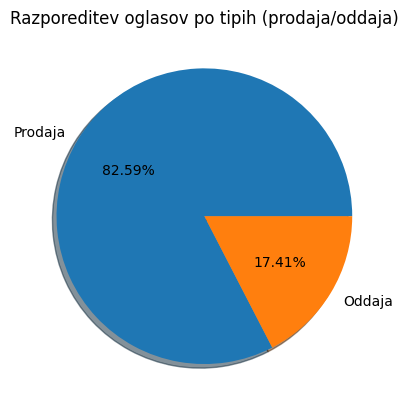

In [3]:
df['ad_type'].value_counts().plot.pie(
    title='Razporeditev oglasov po tipih (prodaja/oddaja)',
    labels=['Prodaja', 'Oddaja'],
    autopct='%.2f%%',
    shadow=True,        
    ylabel='',    
)

In [4]:
df['ad_type'].value_counts()

ad_type
prodaja    6262
oddaja     1320
Name: count, dtype: int64

## Razdelek 1.2
## Razporeditev oglasov po tipu nepremičnine (hiša/stanovanje)

Zdaj si oglejmo razporeditev oglasov med hišami in stanovanji. Ta analiza nam bo pomagala razumeti relativno razpoložljivost različnih vrst nepremičnin na trgu in ali obstaja prednost enega tipa pred drugim.

<Axes: title={'center': 'Razporeditev oglasov po tipu nepremičnine (hiša/stanovanje)'}>

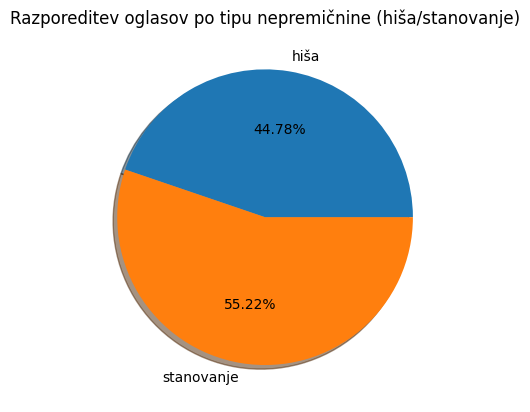

In [5]:
df.groupby('real_estate_type').size().plot.pie(
    title='Razporeditev oglasov po tipu nepremičnine (hiša/stanovanje)',
    autopct='%.2f%%',
    shadow=True,        
    ylabel='',    
)

In [6]:
df['real_estate_type'].value_counts()

real_estate_type
stanovanje    4187
hiša          3395
Name: count, dtype: int64

Oglejmo si tudi razporeditev oglasov po tipu oglasa (prodaja/oddaja) in tipu nepremičnine (hiša/stanovanje) hkrati.

<Axes: title={'center': 'Razporeditev oglasov po tipu oglasa (prodaja/oddaja) in tipu nepremičnine (hiša/stanovanje)'}>

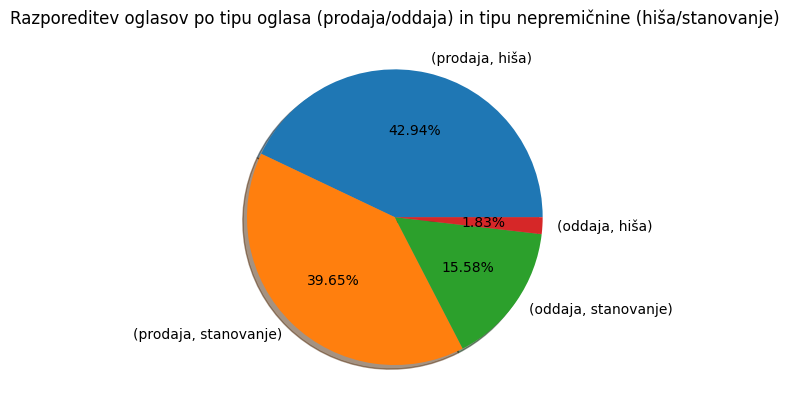

In [7]:
df[['ad_type', 'real_estate_type']].value_counts().plot.pie(
    title='Razporeditev oglasov po tipu oglasa (prodaja/oddaja) in tipu nepremičnine (hiša/stanovanje)',
    autopct='%.2f%%',
    shadow=True,        
    ylabel='',    
)

In [8]:
df[['ad_type', 'real_estate_type']].value_counts()

ad_type  real_estate_type
prodaja  hiša                3256
         stanovanje          3006
oddaja   stanovanje          1181
         hiša                 139
Name: count, dtype: int64

## Razdelek 1.3
## Geografska razporeditev

Zdaj bomo prikazali razporeditev nepremičninskih oglasov po različnih regijah. Ta geografska analiza bo razkrila območja z visoko koncentracijo oglasov, kar lahko kaže na vroče točke trga ali razlike v razpoložljivosti nepremičnin.

<Axes: title={'center': 'Geografska razporeditev'}, ylabel='region'>

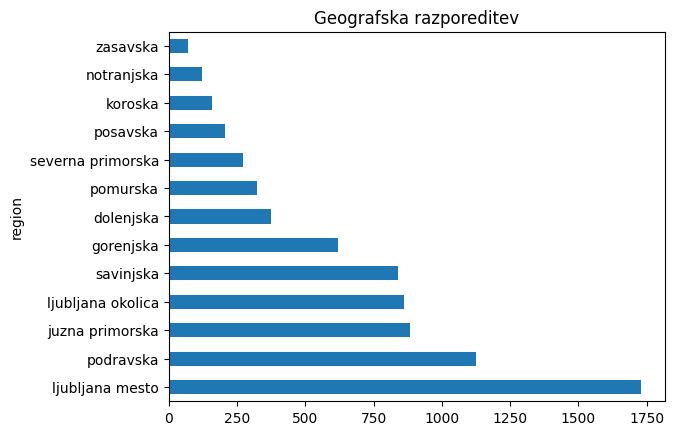

In [9]:
df['region'].value_counts().plot.barh(
    title="Geografska razporeditev"
)

In [10]:
df['region'].value_counts()

region
ljubljana mesto      1730
podravska            1126
juzna primorska       883
ljubljana okolica     861
savinjska             840
gorenjska             621
dolenjska             373
pomurska              322
severna primorska     270
posavska              207
koroska               160
notranjska            120
zasavska               69
Name: count, dtype: int64

## Sklep

Po kratkem pregledu trga lahko zaključimo, da na njem prevladujejo oglasi za prodajo nepremičnin. Pri tem je razdelitev med prodajo stanovanj in hiš enaka, medtem ko se veliko več stanovanj oddaja v najem.

Če pogledamo razporeditev po regijah, je vidno, da je največ ponudb v Ljubljani.

***
# Poglavje 2
# Analiza cen

V tem razdelku bomo analizirali razporeditev in trende cen nepremičnin. To vključuje preučevanje splošne razporeditve cen, izračun povprečnih in medianih cen za različne tipe nepremičnin ter raziskovanje, kako se cene razlikujejo glede na regijo. Prav tako bomo raziskali razmerje med ceno in značilnostmi nepremičnin, kot so površina in število sob.

Posebej si bomo ogledali tudi specifične nepremičnine: samostojne hiše in 2-3 sobna stanovanja za prodajo, saj so po skromnem mnenju avtorja to najboljše nepremičnine za nakup, ter sobe, garsonjere in enosobna stanovanja za najem, saj so najbolj primerna za najem študentom.

## Razdelek 2.1
## Razporeditev cen

Najprej bomo preučili splošno razporeditev cen nepremičnin. To vključuje vizualizacijo razporeditve cen na trgu in razumevanje splošnega cenovnega razpona za prodajo in oddajo. Ta analiza zagotavlja osnovo za globlje vpoglede v cenovne trende.

### Podrazdelek 2.1.1
### Razporeditev cen (prodaja)

Za začetek si oglejmo 5 najdražjih in 5 najcenejših ponudb:

In [11]:
sell_df.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6826989,prodaja,hiša,ljubljana mesto,ljubljana,samostojna,474.88,870.0,p+1+2,2024,4161000.0,baza agencija d.o.o.
6827424,prodaja,hiša,gorenjska,kranjska gora,drugo,670.00,470.0,NaN,2020,3950000.0,dom real d.o.o.
6589216,prodaja,stanovanje,ljubljana mesto,ljubljana,5 in večsobno,390.30,NaN,6/7,2022,3932029.0,"ab nepremičnine, agencija za posredovanje v pr..."
6570641,prodaja,hiša,juzna primorska,malija,samostojna,1744.00,33103.0,k+p+1,2007,3900000.0,"aeon nepremičnine, d.o.o."
6824859,prodaja,hiša,severna primorska,kneža,drugo,760.00,28600.0,k+p+1+2/k+p+1+2,1988,3800000.0,zasebna ponudba


In [12]:
sell_df.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6550925,prodaja,hiša,gorenjska,bohinjska bistrica,samostojna,13.66,44.05,NaN,1945,14500.0,"sdh, d.d."
6835049,prodaja,hiša,dolenjska,rajhenav,drugo,55.20,320.00,NaN,1958,15000.0,zavod za gozdove slovenije
6821318,prodaja,hiša,pomurska,čentiba,samostojna,76.00,2772.00,k+p+m,1990,19000.0,zasebna ponudba
6748385,prodaja,hiša,pomurska,lončarovci,samostojna,55.60,1663.00,NaN,1923,19000.0,"nepremičnine djm, posredništvo, mirjana kouter..."
6840678,prodaja,hiša,podravska,podgorci,samostojna,100.00,185.00,NaN,1980,19999.0,zasebna ponudba


Izračunajmo razliko med najdražjim in najcenejšim oglasom:

In [13]:
print(f'Razlika je {float(sell_df['price'].max() - sell_df['price'].min())} evrov.')

Razlika je 4146500.0 evrov.


Oglejmo si najdražje in najcenejše samostojne hiše ter 2-3 sobna stanovanja.

**Samostojne hiše:**

In [14]:
single_homes = sell_df[(sell_df['real_estate_type'] == 'hiša') & (sell_df['type'] == 'samostojna')]
single_homes.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6826989,prodaja,hiša,ljubljana mesto,ljubljana,samostojna,474.88,870.0,p+1+2,2024,4161000.0,baza agencija d.o.o.
6570641,prodaja,hiša,juzna primorska,malija,samostojna,1744.00,33103.0,k+p+1,2007,3900000.0,"aeon nepremičnine, d.o.o."
5610784,prodaja,hiša,juzna primorska,portorož,samostojna,642.00,1606.0,NaN,1969,3600000.0,ruj nepremičnine d.o.o.
6822160,prodaja,hiša,ljubljana mesto,ljubljana,samostojna,433.50,NaN,p+1+2,2023,3390000.0,baza agencija d.o.o.
6732534,prodaja,hiša,juzna primorska,koper,samostojna,438.00,6088.0,NaN,1987,3350000.0,"urbanistika, družba za projektiranje, inženiri..."


In [15]:
single_homes.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6550925,prodaja,hiša,gorenjska,bohinjska bistrica,samostojna,13.66,44.05,NaN,1945,14500.0,"sdh, d.d."
6748385,prodaja,hiša,pomurska,lončarovci,samostojna,55.60,1663.00,NaN,1923,19000.0,"nepremičnine djm, posredništvo, mirjana kouter..."
6821318,prodaja,hiša,pomurska,čentiba,samostojna,76.00,2772.00,k+p+m,1990,19000.0,zasebna ponudba
6840678,prodaja,hiša,podravska,podgorci,samostojna,100.00,185.00,NaN,1980,19999.0,zasebna ponudba
6536083,prodaja,hiša,dolenjska,stranska vas,samostojna,64.00,117.00,NaN,1930,20000.0,nnrn nepremičnine d.o.o. novo mesto


**2-sobna stanovanja:**

In [16]:
two_room_apartments = sell_df[(sell_df['real_estate_type'] == 'stanovanje') & ((sell_df['type'] == '2-sobno') | (sell_df['type'] == '2,5-sobno'))]
two_room_apartments.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6743760,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,90.00,NaN,6/7,2023,977600.0,tivoli d.o.o.
6719365,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,134.20,NaN,5/5,2025,652000.0,"brn nepremičnine, bojan radusinović s.p."
6759055,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,88.50,NaN,NaN,2009,635000.0,dom real d.o.o.
6761576,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,88.50,NaN,me,2009,635000.0,rocco nepremičnine d.o.o.
6788744,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,136.74,NaN,4/4,1997,619095.0,"stoja trade, d.o.o., ljubljana"


In [17]:
two_room_apartments.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6835710,prodaja,stanovanje,koroska,janževski vrh,2-sobno,81.5,NaN,1,1850,47000.0,stanovanjski sklad rs
6837730,prodaja,stanovanje,pomurska,podgradje,"2,5-sobno",55.7,NaN,vp/4,1878,47345.0,puklavec family wines d.o.o.
6837721,prodaja,stanovanje,pomurska,podgradje,"2,5-sobno",55.7,NaN,vp/4,1878,47345.0,puklavec family wines d.o.o.
6480694,prodaja,stanovanje,zasavska,trbovlje,"2,5-sobno",56.7,NaN,2/2,1885,48000.0,cic d.o.o.
6550851,prodaja,stanovanje,podravska,hotinja vas,2-sobno,47.9,648.0,NaN,1970,49000.0,"sdh, d.d."


**3-sobna stanovanja:**

In [18]:
three_room_apartments = sell_df[(sell_df['real_estate_type'] == 'stanovanje') & (sell_df['type'] == '3-sobno')]
three_room_apartments.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6783879,prodaja,stanovanje,ljubljana mesto,ljubljana,3-sobno,147.0,NaN,3/7,2023,1538400.0,tivoli d.o.o.
6466171,prodaja,stanovanje,ljubljana okolica,medvode,3-sobno,366.7,NaN,2/2,2019,1337660.0,ljubljana nepremičnine d.o.o.
6744773,prodaja,stanovanje,ljubljana mesto,ljubljana,3-sobno,187.2,NaN,14/14,2020,1200000.0,rcn d.o.o.
6745383,prodaja,stanovanje,ljubljana mesto,ljubljana,3-sobno,125.0,NaN,5/7,2023,1181400.0,tivoli d.o.o.
6493869,prodaja,stanovanje,ljubljana mesto,ljubljana,3-sobno,297.6,NaN,1/4,2009,1150000.0,"stoja trade, d.o.o., ljubljana"


In [19]:
three_room_apartments.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6502029,prodaja,stanovanje,podravska,rošpoh - del,3-sobno,138.1,NaN,1,1904,37000.0,"agenti nepremičninsko posredovanje, d.o.o."
6727889,prodaja,stanovanje,pomurska,boračeva,3-sobno,52.3,NaN,1/1,1959,49900.0,market center omnis d.o.o.
6622663,prodaja,stanovanje,dolenjska,črnomelj,3-sobno,64.9,NaN,NaN,1995,64900.0,ecom volt media d.o.o.
6745309,prodaja,stanovanje,savinjska,štore,3-sobno,73.0,NaN,p/3,1880,70000.0,"geopro nepremičnine, d.o.o."
6599481,prodaja,stanovanje,savinjska,ljubno ob savinji,3-sobno,67.3,NaN,NaN,1935,70000.0,"janko nepremičnine, ema janko s.p."


Oglejmo si splošno razporeditev cen.

<Axes: title={'center': 'Razporeditev cen'}, ylabel='Frequency'>

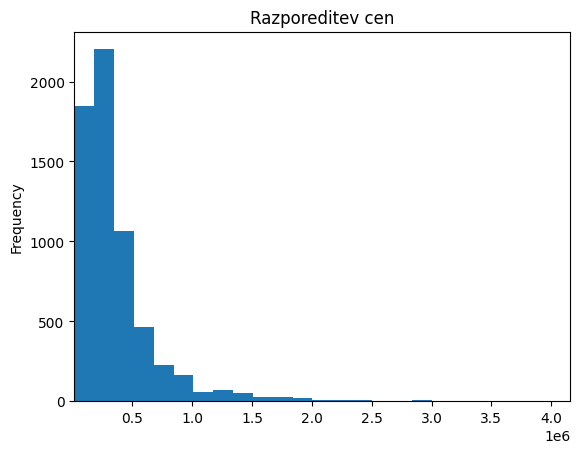

In [20]:
sell_df['price'].plot.hist(
    title='Razporeditev cen',
    bins=25, 
    xlim=[sell_df['price'].min(), sell_df['price'].max()]
)

Opazimo, da večina nepremičnin, ki so naprodaj, stane do 500.000 evrov. Za boljše razumevanje razporeditve cen bomo oglase razdelili v tri cenovne kategorije: od 0 do 500.000 evrov, od 500.000 do 1.000.000 evrov in od 1.000.000 evrov naprej.

<Axes: title={'center': 'Razporeditev cen. Oglasi od 0 do 500.000 evrov'}, ylabel='Frequency'>

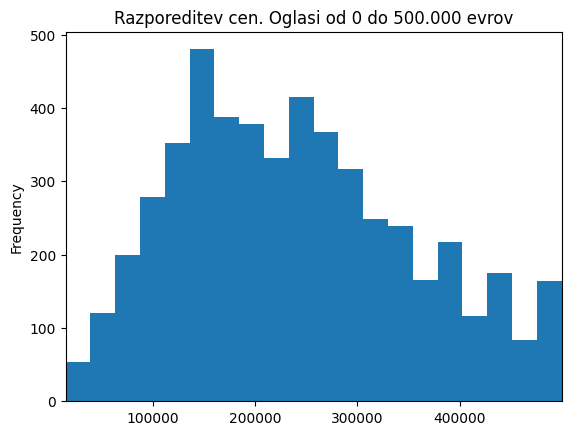

In [21]:
first_group = sell_df[sell_df['price'] < 500000]
first_group['price'].plot.hist(
    title='Razporeditev cen. Oglasi od 0 do 500.000 evrov',
    bins=20, 
    xlim=[first_group['price'].min(), first_group['price'].max()]
)

<Axes: title={'center': 'Razporeditev cen. Oglasi od 500.000 do 1.000.000 evrov'}, ylabel='Frequency'>

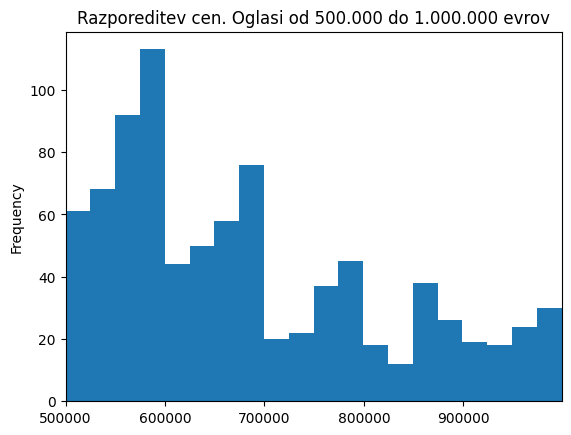

In [22]:
second_group = sell_df[(sell_df['price'] >= 500000) & (sell_df['price'] < 1000000)]
second_group['price'].plot.hist(
    title='Razporeditev cen. Oglasi od 500.000 do 1.000.000 evrov',
    bins=20, 
    xlim=[second_group['price'].min(), second_group['price'].max()]
)

<Axes: title={'center': 'Razporeditev cen. Oglasi od 1.000.000 evrov naprej'}, ylabel='Frequency'>

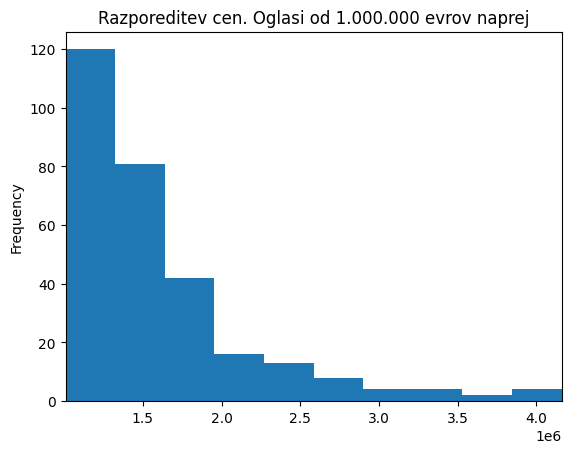

In [23]:
third_group = sell_df[sell_df['price'] > 1000000]
third_group['price'].plot.hist(
    title='Razporeditev cen. Oglasi od 1.000.000 evrov naprej',
    bins=10, 
    xlim=[third_group['price'].min(), third_group['price'].max()]
)

### Podrazdelek 2.1.2
### Razporeditev cen (oddaja)

Spet si oglejmo 5 najdražjih in 5 najcenejših ponudb.

In [24]:
rent_df.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6531465,oddaja,stanovanje,ljubljana mesto,ljubljana,4-sobno,150.00,NaN,NaN,2022,7700.0,"stoja trade, d.o.o., ljubljana"
6790043,oddaja,hiša,ljubljana mesto,ljubljana,samostojna,473.00,770.0,NaN,2007,6000.0,"stoja trade, d.o.o., ljubljana"
6521290,oddaja,stanovanje,ljubljana mesto,ljubljana,3-sobno,150.00,NaN,NaN,2022,5500.0,"stoja trade, d.o.o., ljubljana"
6694221,oddaja,hiša,ljubljana mesto,ljubljana,samostojna,247.93,375.0,NaN,2023,4990.0,"stoja trade, d.o.o., ljubljana"
6775825,oddaja,hiša,ljubljana mesto,ljubljana,samostojna,327.00,337.0,NaN,1964,4900.0,zasebna ponudba


In [25]:
rent_df.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6680231,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,16.0,NaN,NaN,1980,80.0,zasebna ponudba
6780970,oddaja,stanovanje,dolenjska,dolenja nemška vas,drugo,100.0,1500.0,p/p,2002,100.0,zasebna ponudba
6499293,oddaja,hiša,pomurska,dokležovje,samostojna,347.0,1120.0,k+p+1+m,1982,105.0,zasebna ponudba
6689809,oddaja,stanovanje,posavska,sevnica,2-sobno,60.0,NaN,3/4,2005,120.0,zasebna ponudba
6334505,oddaja,stanovanje,savinjska,velenje,soba,22.0,NaN,1/2,2012,120.0,zasebna ponudba


Izračunajmo razliko med najdražjim in najcenejšim oglasom.

In [26]:
print(f'Razlika je {float(rent_df['price'].max() - rent_df['price'].min())} evrov.')

Razlika je 7620.0 evrov.


Oglejmo si najdražje in najcenejše sobe, garsonjere in enosobna stanovanja.

**Sobe:**

In [27]:
rooms = rent_df[(rent_df['real_estate_type'] == 'stanovanje') & (rent_df['type'] == 'soba')]
rooms.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6835692,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,18.0,NaN,8/8,1919,600.0,zasebna ponudba
6827018,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,14.0,372.0,vp,1961,600.0,zasebna ponudba
6839075,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,12.0,NaN,1/p+1+m,2022,550.0,zasebna ponudba
6245572,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,18.0,NaN,vp/3,2017,500.0,"agencija tomc, d.o.o."
6846336,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,17.0,60.0,8/9,1979,500.0,zasebna ponudba


In [28]:
rooms.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6680231,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,16.0,NaN,NaN,1980,80.0,zasebna ponudba
6334505,oddaja,stanovanje,savinjska,velenje,soba,22.0,NaN,1/2,2012,120.0,zasebna ponudba
6254288,oddaja,stanovanje,savinjska,žalec,soba,30.0,750.0,p+1/2,2018,130.0,zasebna ponudba
6846258,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,12.0,NaN,1/1,1970,150.0,zasebna ponudba
6621487,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,9.0,NaN,p/3,1990,150.0,zasebna ponudba


**Garsonjere:**

In [29]:
studios = rent_df[(rent_df['real_estate_type'] == 'stanovanje') & (rent_df['type'] == 'garsonjera')]
studios.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6395503,oddaja,stanovanje,ljubljana mesto,ljubljana,garsonjera,27.0,NaN,NaN,1890,1320.0,agencija elite d.o.o.
6837027,oddaja,stanovanje,ljubljana mesto,ljubljana,garsonjera,35.0,NaN,4/5,2006,1200.0,zasebna ponudba
6831124,oddaja,stanovanje,ljubljana mesto,ljubljana,garsonjera,55.0,NaN,pk/4,2024,1000.0,zasebna ponudba
6846330,oddaja,stanovanje,ljubljana okolica,brezje pri grosupljem,garsonjera,38.5,50.0,p/2,2004,850.0,zasebna ponudba
6841441,oddaja,stanovanje,juzna primorska,kolomban,garsonjera,32.0,NaN,p/p,2023,800.0,zasebna ponudba


In [30]:
studios.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6846671,oddaja,stanovanje,juzna primorska,lucija,garsonjera,20.0,NaN,p,1984,200.0,zasebna ponudba
6841300,oddaja,stanovanje,pomurska,gornja radgona,garsonjera,17.0,NaN,5/5,1967,240.0,zasebna ponudba
6778847,oddaja,stanovanje,koroska,šentjanž pri dravogradu,garsonjera,24.0,NaN,1/3,1900,250.0,"nepremičninska družba, d.o.o., pe re/max premium"
6839311,oddaja,stanovanje,zasavska,trbovlje,garsonjera,28.0,NaN,p,1965,250.0,zasebna ponudba
6774009,oddaja,stanovanje,savinjska,celje,garsonjera,30.0,NaN,vp,2010,250.0,zasebna ponudba


**1-sobna stanovanja:**

In [31]:
one_room_apartments = rent_df[(rent_df['real_estate_type'] == 'stanovanje') & (rent_df['type'] == '1-sobno')]
one_room_apartments.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6821522,oddaja,stanovanje,ljubljana mesto,ljubljana,1-sobno,83.0,NaN,m/m,1520,1600.0,zasebna ponudba
6738270,oddaja,stanovanje,ljubljana mesto,ljubljana,1-sobno,45.0,NaN,NaN,2003,1200.0,zasebna ponudba
6508408,oddaja,stanovanje,juzna primorska,koper,1-sobno,55.0,NaN,1/1,2020,1100.0,zasebna ponudba
6835333,oddaja,stanovanje,ljubljana mesto,ljubljana,1-sobno,51.4,NaN,NaN,1600,1100.0,"aeon nepremičnine, d.o.o."
6845922,oddaja,stanovanje,ljubljana mesto,ljubljana,1-sobno,30.0,NaN,1/4,1990,1100.0,zasebna ponudba


In [32]:
one_room_apartments.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6507944,oddaja,stanovanje,posavska,cerklje ob krki,1-sobno,50.0,NaN,1,1993,200.0,zasebna ponudba
6728409,oddaja,stanovanje,dolenjska,kočevska reka,1-sobno,23.0,NaN,p/1,1950,200.0,zasebna ponudba
6828267,oddaja,stanovanje,dolenjska,črnomelj,1-sobno,23.0,NaN,p/4,1984,220.0,zasebna ponudba
6834291,oddaja,stanovanje,savinjska,vitanje,1-sobno,45.0,NaN,1,1856,300.0,"nepremičninska družba, d.o.o., pe re/max premium"
6838784,oddaja,stanovanje,savinjska,žiče,1-sobno,35.0,NaN,p,2020,300.0,zasebna ponudba


Oglejmo si splošno razporeditev cen.

<Axes: title={'center': 'Razporeditev cen'}, ylabel='Frequency'>

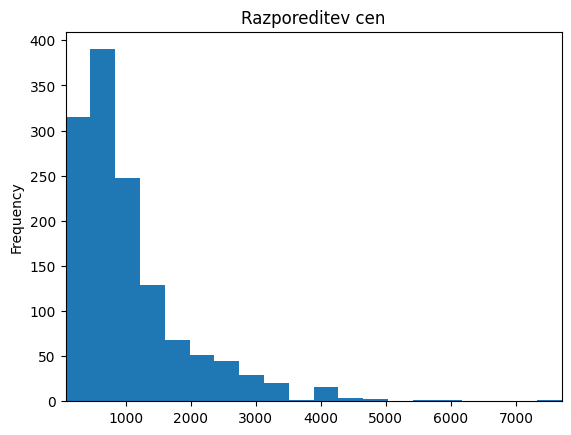

In [33]:
rent_df['price'].plot.hist(
    title='Razporeditev cen',
    bins=20, 
    xlim=[rent_df['price'].min(), rent_df['price'].max()]
)

Opazimo, da je večina oglasov za najem stanovanj v cenovnem razponu od 0 do 1000 evrov/mesec, zato bomo podrobneje pogledali razporeditev oglasov v tem cenovnem razponu.

<Axes: title={'center': 'Razporeditev cen. Oglasi od 0 do 1000 evrov'}, ylabel='Frequency'>

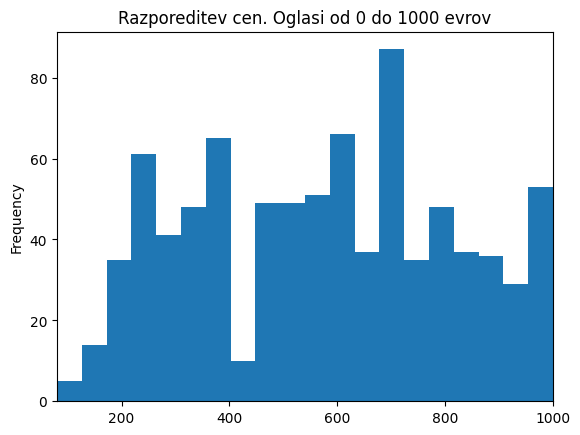

In [34]:
first_group = rent_df[rent_df['price'] <= 1000]
first_group['price'].plot.hist(
    title='Razporeditev cen. Oglasi od 0 do 1000 evrov',
    bins=20, 
    xlim=[first_group['price'].min(), first_group['price'].max()]
)

## Razdelek 2.2
##  Povprečne in mediane cene

V tem podrazdelku bomo izračunali in primerjali povprečne in mediane cene nepremičnin. Analiza bo segmentirana po tipu nepremičnine (hiše, stanovanja) in tipu oglasa (prodaja, najem), da bi izpostavili morebitne razlike. Razumevanje teh mer centralne tendence pomaga oceniti tipične tržne cene.

### Podrazdelek 2.2.1
### Povprečne in mediane cene (prodaja)

Izračunajmo povprečne in mediane vrednosti cene prodaje hiš in stanovanj.

In [35]:
sell_df.groupby('real_estate_type')['price'].agg(['mean', 'median'])

,mean,median
real_estate_type,,
hiša,429723.405365,299000.0
stanovanje,299924.077023,245000.0


Posebej bomo pregledali povprečne in mediane cene prodaje samostojnih hiš in 2-3 sobnih stanovanj.

**Samostojne hiše:**

In [36]:
single_homes['price'].agg(['mean', 'median'])

mean      430047.625097
median    286273.000000
Name: price, dtype: float64

**2-sobni stanovanja:**

In [37]:
two_room_apartments['price'].agg(['mean', 'median'])

mean      202327.800099
median    180000.000000
Name: price, dtype: float64

**3-sobni stanovanja:**

In [38]:
three_room_apartments['price'].agg(['mean', 'median'])

mean      304443.466515
median    265000.000000
Name: price, dtype: float64

### Podrazdelek 2.2.2
### Povprečne in mediane cene (oddaja)

Izračunajmo povprečne in mediane vrednosti cene najema hiš in stanovanj.

In [39]:
rent_df.groupby('real_estate_type')['price'].agg(['mean', 'median'])

,mean,median
real_estate_type,,
hiša,1979.805755,1800.0
stanovanje,950.673497,700.0


Posebej bomo pregledali povprečne in mediane cene najema sob, garsonjer in 1 sobnih stanovanj.

**Sobe:**

In [40]:
rooms['price'].agg(['mean', 'median'])

mean      264.782609
median    250.000000
Name: price, dtype: float64

**Garsonjere:**

In [41]:
studios['price'].agg(['mean', 'median'])

mean      532.858065
median    550.000000
Name: price, dtype: float64

**1-sobni stanovanja:**

In [42]:
one_room_apartments['price'].agg(['mean', 'median'])

mean      590.325
median    550.000
Name: price, dtype: float64

## Razdelek 2.3
## Regionalne razlike v cenah

Tukaj bomo raziskali, kako se cene nepremičnin razlikujejo po različnih regijah in mestih. S primerjavo povprečnih cen na različnih lokacijah lahko prepoznamo dražja in cenejša območja, kar nam omogoča vpogled v regionalno dinamiko cen.

### Podrazdelek 2.3.1
### Regionalne razlike v cenah (prodaja)

Oglejmo si, kako se povprečne in mediane cene spreminjajo glede na regijo:

In [43]:
sell_df.groupby('region')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False])

,mean,median
region,,
ljubljana mesto,567460.868815,450000.00
juzna primorska,517418.896432,365000.00
ljubljana okolica,447831.220616,359000.00
gorenjska,384812.035750,278000.00
severna primorska,274132.791772,196500.00
savinjska,261428.536517,197975.00
podravska,246434.236762,199868.75
posavska,228079.790867,192000.00
dolenjska,219789.857795,198294.65


<Axes: title={'center': 'Regionalne razlike v cenah'}, ylabel='region'>

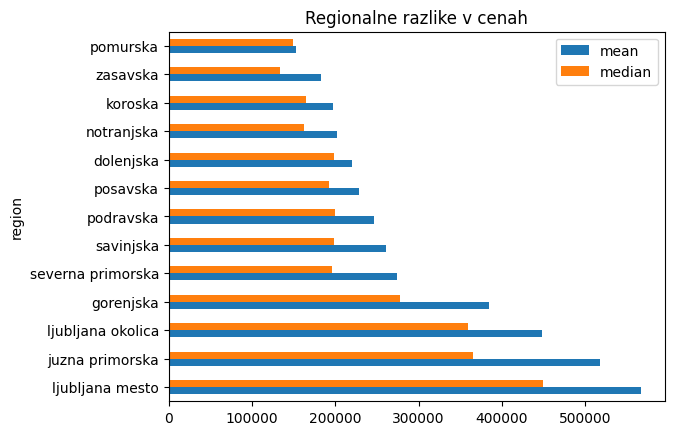

In [44]:
sell_df.groupby('region')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).plot.barh(
    title='Regionalne razlike v cenah'
)

Vidimo, da so najdražje nepremičnine v Ljubljani, njene okolice in na morju.

Zdaj si bomo ogledali 10 najdražjih mest za nakup nepremičnin, v katerih je objavljenih vsaj 25 oglasov.

In [45]:
cities_25 = []
for city in set(sell_df['city']):
    if int(sell_df['city'].value_counts()[city]) >= 25:
        cities_25.append(city)

In [46]:
sell_df[sell_df['city'].isin(cities_25)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10)

,mean,median
city,,
portorož,926460.000000,690000.0
kranjska gora,739986.411765,518675.0
bled,664892.857143,595000.0
ljubljana,567460.868815,450000.0
koper,526508.594118,407542.5
medvode,508273.363636,450000.0
izola,456563.994432,340000.0
vrhnika,435320.000000,405000.0
piran,421745.783133,312000.0


<Axes: title={'center': 'Mestne razlike v cenah (mesta z vsaj 25 oglasov)'}, ylabel='city'>

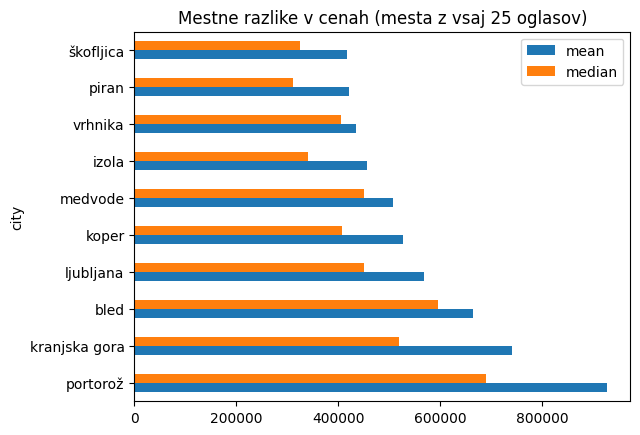

In [47]:
sell_df[sell_df['city'].isin(cities_25)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10).plot.barh(
    title='Mestne razlike v cenah (mesta z vsaj 25 oglasov)'
)

In enako bomo storili z mesti, v katerih je objavljenih več kot 100 oglasov.

In [48]:
cities_100 = []
for city in set(sell_df['city']):
    if int(sell_df['city'].value_counts()[city]) >= 100:
        cities_100.append(city)

In [49]:
sell_df[sell_df['city'].isin(cities_100)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10)

,mean,median
city,,
ljubljana,567460.868815,450000.0
koper,526508.594118,407542.5
kranj,346835.221235,269761.0
celje,284387.027950,195061.0
novo mesto,250789.808880,248000.0


<Axes: title={'center': 'Mestne razlike v cenah (mesta z več kot 100 oglasov)'}, ylabel='city'>

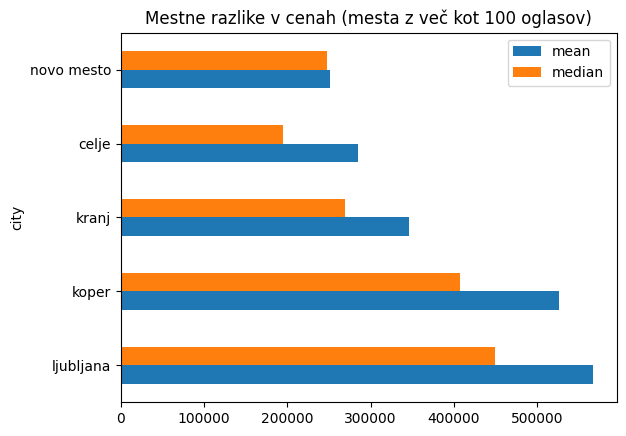

In [50]:
sell_df[sell_df['city'].isin(cities_100)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10).plot.barh(
    title='Mestne razlike v cenah (mesta z več kot 100 oglasov)'
)

### Podrazdelek 2.3.2
### Regionalne razlike v cenah (oddaja)

Oglejmo si, kako se povprečne in mediane cene spreminjajo glede na regijo:

In [51]:
rent_df.groupby('region')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False])

,mean,median
region,,
ljubljana mesto,1430.718213,1200.0
ljubljana okolica,1197.719298,900.0
juzna primorska,906.666667,700.0
gorenjska,896.191489,800.0
posavska,605.000000,425.0
podravska,599.713333,550.0
savinjska,583.990476,500.0
notranjska,538.750000,475.0
koroska,524.782609,450.0


<Axes: title={'center': 'Regionalne razlike v cenah'}, ylabel='region'>

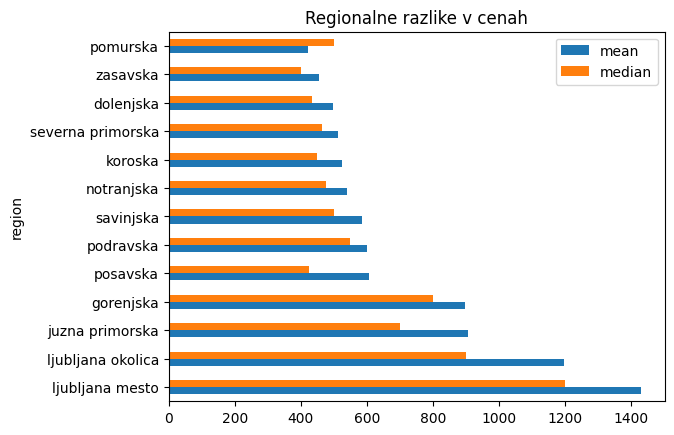

In [52]:
rent_df.groupby('region')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).plot.barh(
    title='Regionalne razlike v cenah'
)

Spet vidimo, da so najdražje nepremičnine za najem v Ljubljani, njene okolice in na morju.

Zdaj si bomo ogledali 10 najdražjih mest za najem nepremičnin, v katerih je objavljenih vsaj 10 oglasov.

In [53]:
cities_25_rent = []
for city in set(rent_df['city']):
    if int(rent_df['city'].value_counts()[city]) >= 10:
        cities_25_rent.append(city)

In [54]:
rent_df[rent_df['city'].isin(cities_25_rent)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10)

,mean,median
city,,
ljubljana,1430.718213,1200.0
bled,990.000000,800.0
portorož,950.000000,750.0
kranj,940.800000,1076.0
koper,907.317073,700.0
piran,855.294118,600.0
izola,799.375000,635.0
celje,663.333333,600.0
ptuj,615.454545,600.0


<Axes: title={'center': 'Mestne razlike v cenah (mesta z vsaj 10 oglasov)'}, ylabel='city'>

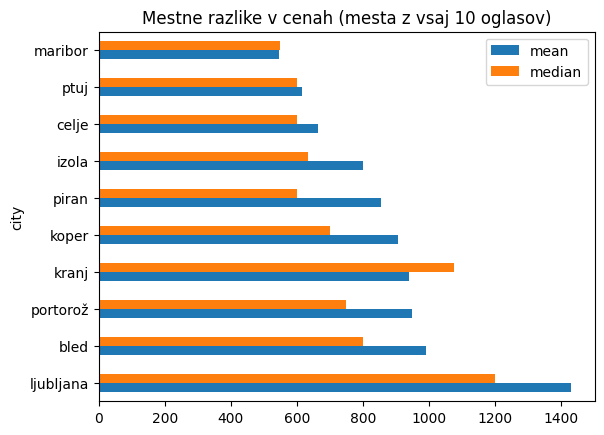

In [55]:
rent_df[rent_df['city'].isin(cities_25_rent)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10).plot.barh(
    title='Mestne razlike v cenah (mesta z vsaj 10 oglasov)'
)

In enako bomo storili z mesti, v katerih je objavljenih več kot 25 oglasov.

In [56]:
cities_100_rent = []
for city in set(rent_df['city']):
    if int(rent_df['city'].value_counts()[city]) >= 25:
        cities_100_rent.append(city)

In [57]:
rent_df[rent_df['city'].isin(cities_100_rent)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10)

,mean,median
city,,
ljubljana,1430.718213,1200.0
kranj,940.800000,1076.0
koper,907.317073,700.0
celje,663.333333,600.0
maribor,546.730769,550.0


<Axes: title={'center': 'Mestne razlike v cenah (mesta z več kot 25 oglasov)'}, ylabel='city'>

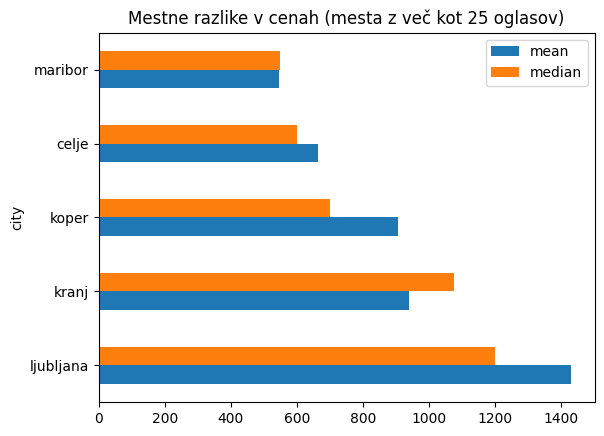

In [58]:
rent_df[rent_df['city'].isin(cities_100_rent)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10).plot.barh(
    title='Mestne razlike v cenah (mesta z več kot 25 oglasov)'
)

***
# Poglavje 3
# Analiza značilnosti nepremičnin

Ta razdelek se osredotoča na analizo specifičnih značilnosti nepremičnin, kot so leto gradnje in bivalni prostor. Raziskali bomo, kako ti dejavniki vplivajo na cene nepremičnin in druge tržne dinamike. Razumevanje teh značilnosti lahko zagotovi globlje vpoglede v to, kaj vpliva na vrednost nepremičnine.

Na začetku poglavja si bomo ogledali, kako so vse zanimive značilnosti (region, mesto, bivalni prostor, površina zemljišča, leto gradnje in cena) povezane med seboj. Za to bomo vse zanimive podatke tipa `string` pretvorili v številčno obliko (regije in mesta bomo ocenili glede na število oglasov v njih) in narisali korelacijsko matriko.

Omejili se bomo samo na oglase za prodajo.

In [59]:
def interpreter(data_frame, column_index, transitional_dict):

    for i_id, object_ in enumerate(data_frame.iloc [:, column_index]):
        numeric_df.iat[i_id, column_index] = transitional_dict[object_]

In [60]:
transitional_dict_regions = {}
for region in set(sell_df['region']):
    points = int(sell_df.groupby('region').size()[region])
    transitional_dict_regions[region] = points

In [61]:
transitional_dict_cities = {}
for city in set(sell_df['city']):
    points = int(sell_df.groupby('city').size()[city])
    transitional_dict_cities[city] = points

In [62]:
numeric_df = sell_df.copy()

interpreter(numeric_df, 2, transitional_dict_regions)
numeric_df['region'] = numeric_df['region'].astype(int)

interpreter(numeric_df, 3, transitional_dict_cities)
numeric_df['city'] = numeric_df['city'].astype(int)

Text(0.5, 1.0, 'Korelacijska matrika')

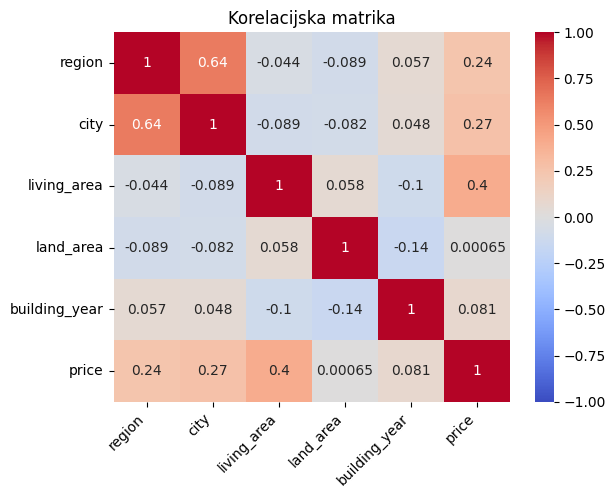

In [63]:
numeric_df = numeric_df.select_dtypes(include=np.number)
matrix = numeric_df.corr()
sbn.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(rotation=45, ha="right")
plt.title("Korelacijska matrika")

Vidimo, da na ceno najbolj vplivata regija, mesto in bivalni prostor. Vpliv bivalnega prostora in leta gradnje se zdi zanemarljiv. Da bi ugotovili, ali je to res tako, bomo preučili, kako te značilnosti nepremičnine vplivajo na njeno vrednost v posameznih regijah.

## Razdelek 3.1
## Leto gradnje

V tem podrazdelku bomo analizirali razporeditev nepremičnin glede na leto gradnje. Prav tako bomo primerjali, kako starost nepremičnine vpliva na njeno ceno in druge značilnosti. Ta analiza lahko razkrije trende, povezane s povpraševanjem po starejših ali novejših nepremičninah.

Za začetek si bomo ogledali razporeditev števila oglasov glede na leto gradnje.

<Axes: title={'center': 'Razporeditev števila oglasov glede na leto gradnje'}, ylabel='Frequency'>

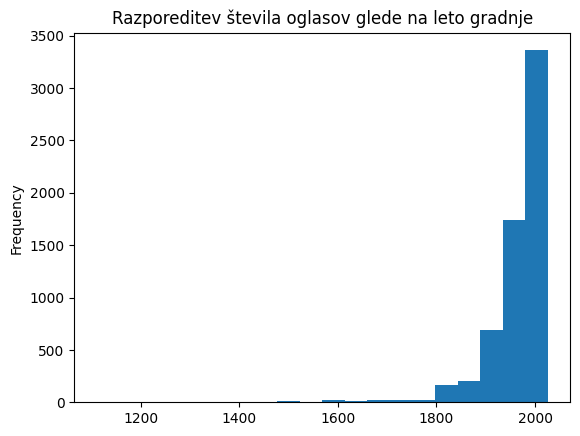

In [64]:
sell_df['building_year'].plot.hist(
    title='Razporeditev števila oglasov glede na leto gradnje',
    bins=20
)

Vidimo, da so na trgu v prevladujočem številu predstavljeni objekti, zgrajeni po letu 1900. Zato si bomo ogledali, kako leto gradnje za objekte, zgrajene po letu 1900, vpliva na njihovo ceno v regijah, kot sta Ljubljana, Podravska in Južna Primorska.

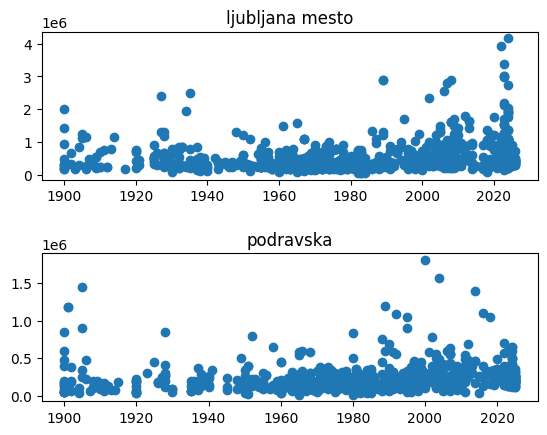

In [65]:
for index, region in enumerate(['ljubljana mesto', 'podravska']):
    tmp_df = sell_df[(sell_df['region'] == region) & ((sell_df['building_year'] >= 1900))]
    
    plt.subplot (2, 1, index + 1)
    plt.scatter(
        x=tmp_df['building_year'], 
        y=tmp_df['price']
    )
    plt.title(region)
    plt.subplots_adjust(hspace=0.5)

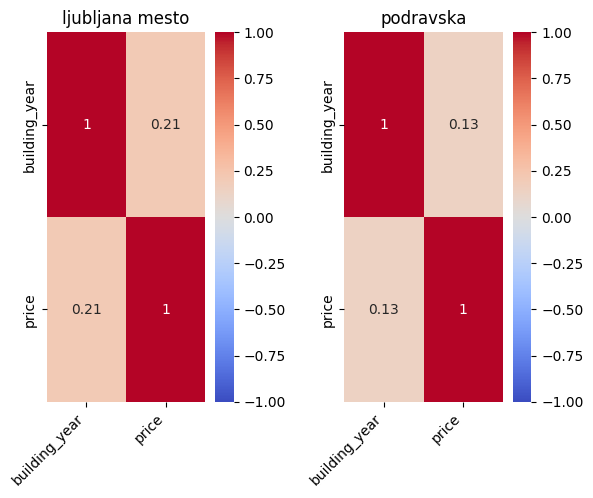

In [66]:
for index, region in enumerate(['ljubljana mesto', 'podravska']):
    tmp_df = sell_df[(sell_df['region'] == region) & ((sell_df['building_year'] >= 1900))]
    
    plt.subplot (1, 2, index + 1)
    matrix = tmp_df[['building_year', 'price']].corr()
    sbn.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.xticks(rotation=45, ha="right")
    plt.title(region)
    plt.subplots_adjust(wspace=0.5)

Vidimo, da se potrjuje malo vpliva leta gradnje na vrednost nepremičnine.

## Razdelek 3.2
## Bivalni prostor

Ta podrazdelek bo raziskal razmerje med bivalno površino in ceno nepremičnine. Analizirali bomo, kako ta dejavnik vpliva na vrednost nepremičnine.

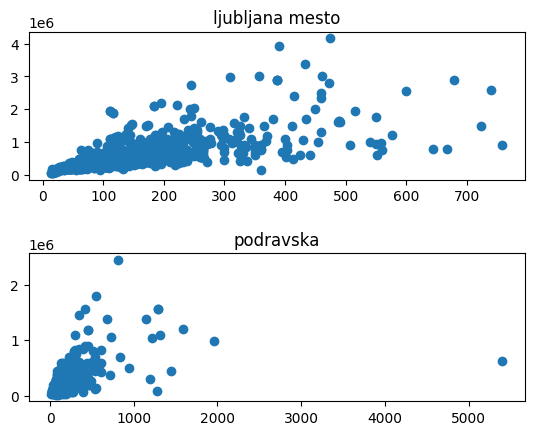

In [67]:
for index, region in enumerate(['ljubljana mesto', 'podravska']):
    tmp_df = sell_df[(sell_df['region'] == region)]
    
    plt.subplot (2, 1, index + 1)
    plt.scatter(
        x=tmp_df['living_area'], 
        y=tmp_df['price']
    )
    plt.title(region)
    plt.subplots_adjust(hspace=0.5)

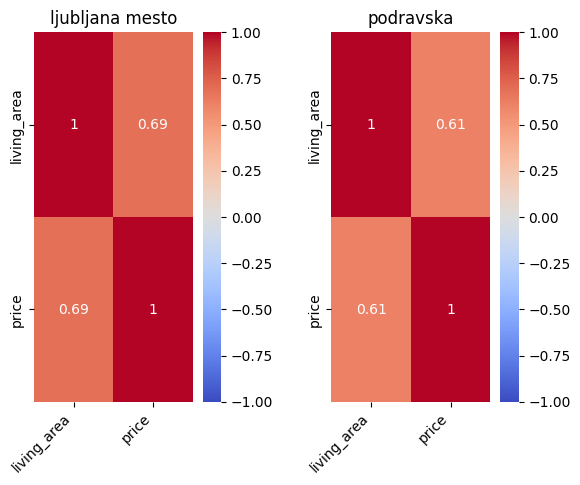

In [68]:
for index, region in enumerate(['ljubljana mesto', 'podravska']):
    tmp_df = sell_df[(sell_df['region'] == region) & ((sell_df['building_year'] >= 1900))]
    
    plt.subplot (1, 2, index + 1)
    matrix = tmp_df[['living_area', 'price']].corr()
    sbn.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.xticks(rotation=45, ha="right")
    plt.title(region)
    plt.subplots_adjust(wspace=0.5)

Vidimo, da vpliv bivalnega prostora na ceno nepremičnine v vsake regiji posebej postane precej močan. Z rastjo bivalnega prostora očitno narašča tudi vrednost nepremičnine.

***
# Poglavje 4
# Primerjalna analiza najema in prodaje

Tukaj bomo primerjali trge najema in prodaje, pri čemer se bomo osredotočili na razmerja cen in donosnost najema. Z analizo cene na kvadratni meter tako za najem kot za prodajo ter izračunom ocenjene donosnosti najema bomo lahko ponudili vpoglede v relativno donosnost najema v primerjavi z nakupom v različnih regijah in za različne tipe nepremičnin.

## Razdelek 4.1
## Razmerje cen

Primerjali bomo ceno na kvadratni meter za nepremičnine, oglaševane za prodajo, v primerjavi z najemom. Ta analiza bo razkrila relativno stroškovno učinkovitost najema v primerjavi z nakupom, kar nam bo omogočilo vpogled v to, katera možnost je finančno ugodnejša v različnih regijah.

Izračunajmo povprečno ceno na kvadratni meter za vsak oglas:

In [69]:
df['price_per_sq_m'] = df['price'] / df['living_area']
sell_df = df[df['ad_type'] == 'prodaja']
rent_df = df[df['ad_type'] == 'oddaja']

Oglejmo si, v katerih regijah je najvišja cena na kvadratni meter.

In [70]:
sell_df.groupby(['ad_type', 'region'])['price_per_sq_m'].agg(['mean']).sort_values('mean', ascending=False)

mean
ad_type region                        
prodaja ljubljana mesto    4382.783443
        juzna primorska    3936.583407
        gorenjska          2814.747261
        ljubljana okolica  2611.342945
        dolenjska          1974.431107
        podravska          1755.918942
        savinjska          1724.710966
        severna primorska  1700.431264
        notranjska         1573.277685
        posavska           1571.270326
        pomurska           1456.014227
        koroska            1455.273712
        zasavska           1450.054590

In [71]:
rent_df.groupby(['ad_type', 'region'])['price_per_sq_m'].agg(['mean']).sort_values('mean', ascending=False)

mean
ad_type region                      
oddaja  ljubljana mesto    19.044129
        juzna primorska    17.342268
        gorenjska          14.274633
        ljubljana okolica  13.243688
        podravska          11.219229
        savinjska          10.523263
        severna primorska   9.859549
        dolenjska           9.518720
        zasavska            8.740932
        posavska            8.658085
        koroska             8.405128
        pomurska            7.461909
        notranjska          6.907558

Vidimo, da so najdražji regiji za nakup in najem nepremičnin: Ljubljana, Južna Primorska in Gorenjska. Najcenejše nepremičnine za nakup se nahajajo v takih regijah kot: Zasavska, Pomurska in Koroška, medtem ko so najcenejše nepremičnine za najem se nahajajo v takih regijah kot: Notranjska, Koroška in Zasavska.

Izračunajmo povprečno razmerje med ceno na kvadratni meter za prodajo in ceno na kvadratni meter za najem za vsako regijo.

In [72]:
sale_to_rent_ratio = {}

for region in set(df['region']):
    tmp_df = df[df['region'] == region]
    sell_price = tmp_df[tmp_df['ad_type'] == 'prodaja']['price_per_sq_m'].mean()
    rent_price = tmp_df[tmp_df['ad_type'] == 'oddaja']['price_per_sq_m'].mean()
    ratio = float(sell_price / rent_price)
    sale_to_rent_ratio[region] = ratio

sale_to_rent_ratio_df = pd.DataFrame(list(sale_to_rent_ratio.items()), columns=['region', 'sale_to_rent_ratio'])
sale_to_rent_ratio_df.sort_values('sale_to_rent_ratio')
    

,region,sale_to_rent_ratio
6,podravska,156.509769
5,savinjska,163.895071
9,zasavska,165.892440
8,severna primorska,172.465425
1,koroska,173.141169
10,posavska,181.480115
2,pomurska,195.126226
3,ljubljana okolica,197.176422
4,gorenjska,197.185257
11,dolenjska,207.426110


<Axes: ylabel='region'>

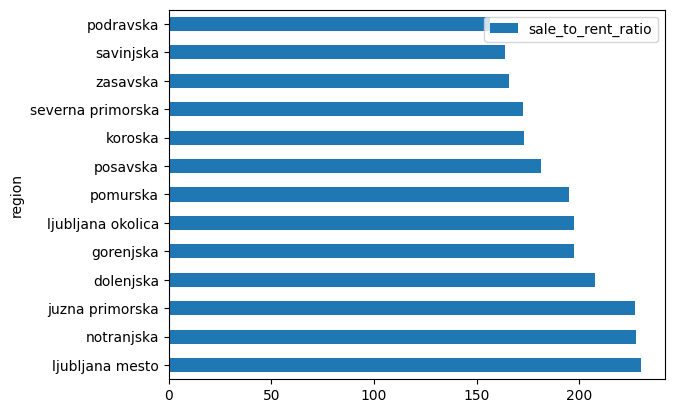

In [73]:
sale_to_rent_ratio_df.sort_values('sale_to_rent_ratio', ascending=False).plot.barh(
    x='region'
)

## Razdelek 4.2
## Donosnost najema

V tem podrazdelku bomo izračunali ocenjeno donosnost najema, ki je razmerje med povprečno ceno najema in ceno prodaje. Ta kazalnik pomaga oceniti potencialni donos naložbe v nepremičnine za najem, kar zagotavlja vpogled za investitorje.

Bomo pogledali donosnost oddajanja v najem v odstotkih na leto garsonjer, 1-3 sobnih stanovanj ter samostojnih hiš v različnih regijah.

In [74]:
def get_rental_income(real_estate_type, df):
    profit_by_region = {}

    for region in set(df['region']):
        tmp_df = df[(df['region'] == region) & (df['type'] == real_estate_type)]
        sell_price = tmp_df[tmp_df['ad_type'] == 'prodaja']['price'].mean()
        rent_price = tmp_df[tmp_df['ad_type'] == 'oddaja']['price'].mean()
        profit = float((rent_price * 12) / sell_price) * 100
        profit_by_region[region] = profit

    return profit_by_region

**Samostojne hiše:**

In [75]:
profit_single_houses = get_rental_income('samostojna', df)

profit_single_houses_df = pd.DataFrame(list(profit_single_houses.items()), columns=['region', 'profit'])
profit_single_houses_df.sort_values('profit', ascending=False)

,region,profit
11,dolenjska,8.354495
9,zasavska,6.443140
1,koroska,6.143840
6,podravska,5.110495
8,severna primorska,4.744747
10,posavska,4.604497
3,ljubljana okolica,4.444879
5,savinjska,4.214539
12,ljubljana mesto,3.644482
7,notranjska,3.246478


**Garsonjere:**

In [76]:
profit_studios = get_rental_income('garsonjera', df)

profit_studios = pd.DataFrame(list(profit_studios.items()), columns=['region', 'profit'])
profit_studios.sort_values('profit', ascending=False)

,region,profit
12,ljubljana mesto,5.080949
4,gorenjska,4.883311
5,savinjska,4.791527
3,ljubljana okolica,4.718452
6,podravska,4.645195
1,koroska,4.413188
0,juzna primorska,3.858518
11,dolenjska,3.845063
2,pomurska,2.635277
7,notranjska,NaN


**1-sobna stanovanja:**

In [77]:
profit_one_room_apartments = get_rental_income('1-sobno', df)

profit_one_room_apartments = pd.DataFrame(list(profit_one_room_apartments.items()), columns=['region', 'profit'])
profit_one_room_apartments.sort_values('profit', ascending=False)

,region,profit
2,pomurska,6.848394
1,koroska,6.056075
5,savinjska,5.761444
8,severna primorska,5.567010
6,podravska,5.408481
4,gorenjska,5.192571
12,ljubljana mesto,5.082386
3,ljubljana okolica,4.250159
0,juzna primorska,3.910605
11,dolenjska,2.658146


**2-sobna stanovanja:**

In [78]:
profit_two_room_apartments = get_rental_income('2-sobno', df)

profit_two_room_apartments = pd.DataFrame(list(profit_two_room_apartments.items()), columns=['region', 'profit'])
profit_two_room_apartments.sort_values('profit', ascending=False)

,region,profit
9,zasavska,5.454545
6,podravska,5.380592
4,gorenjska,5.375147
12,ljubljana mesto,4.989986
1,koroska,4.702788
3,ljubljana okolica,4.609551
5,savinjska,4.602812
7,notranjska,4.130501
8,severna primorska,3.890729
0,juzna primorska,3.749454


**3-sobna stanovanja:**

In [79]:
profit_three_room_apartments = get_rental_income('3-sobno', df)

profit_three_room_apartments = pd.DataFrame(list(profit_three_room_apartments.items()), columns=['region', 'profit'])
profit_three_room_apartments.sort_values('profit', ascending=False)

,region,profit
5,savinjska,5.627987
12,ljubljana mesto,5.122652
4,gorenjska,4.817961
2,pomurska,4.486400
8,severna primorska,4.361357
6,podravska,4.330580
0,juzna primorska,4.008613
7,notranjska,3.504878
3,ljubljana okolica,3.456201
1,koroska,3.270250


Izračunajmo tudi povprečno donosnost oddajanja v najem v Sloveniji kot celoti:

In [80]:
mean_sell_price = df[df['ad_type'] == 'prodaja']['price'].mean()
mean_rent_price = df[df['ad_type'] == 'oddaja']['price'].mean()
print('Povprečna donosnost je {0:.2f}% na leto.'.format((mean_rent_price * 12) / mean_sell_price * 100))

Povprečna donosnost je 3.46% na leto.


***
# Poglavje 5
# Rezultati

Izpostavimo najbolj zanimive rezultate analize:

- Na trgu prevladujejo prodajni oglasi (6-kratna premoč nad oglasi za najem).
- Najem hiše bo težaven (le 140 ponudb).
- Ponudbe za prodajo se začnejo pri 15.000 evrih in segajo do 4.000.000 evrov.
- Povprečna cena 2-sobnega stanovanja znaša 200.000 evrov, medtem ko 3-sobno stanovanje stane 300.000 evrov.
- Študent lahko računa na sobo za 250 evrov na mesec ali na garsonjero/1-sobno stanovanje za 600 evrov na mesec.
- Najdražje nepremičnine so v Ljubljani in ob morju. Najdražje mesto za nakup nepremičnine je Portorož.
- Leto gradnje nima vpliva na ceno stanovanja. Regija ima na ceno stanovanja majhen vpliv.
- Donosnost oddajanja nepremičnin v najem se giblje med 3 in 7 odstotki.